In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Load data into pandas DataFrame
data_path_wine = 'WineQT.csv'
wine_data=pd.read_csv(data_path_wine,header=0)
wine_data=wine_data.drop(['Id'], axis = 1) # Drop first column thats just an ID columns
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Print the Column Names
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
# Print the number of rows
print('{} Rows'.format(len(wine_data)))

1143 Rows


In [5]:
# Summary Stats
wine_data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [14]:
#### Check for Null values using a loop
for column_name, column_data in wine_data.iteritems():
    count_na = column_data.isna().sum()
    print('{} Null values in column {}'.format(count_na,column_name))

0 Null values in column fixed acidity
0 Null values in column volatile acidity
0 Null values in column citric acid
0 Null values in column residual sugar
0 Null values in column chlorides
0 Null values in column free sulfur dioxide
0 Null values in column total sulfur dioxide
0 Null values in column density
0 Null values in column pH
0 Null values in column sulphates
0 Null values in column alcohol
0 Null values in column quality


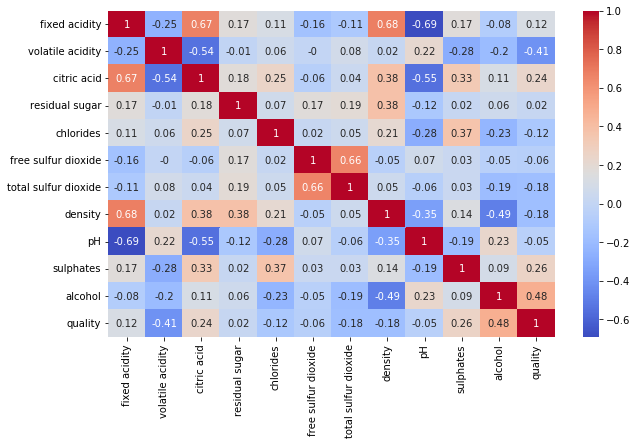

In [3]:
#### Correlation Matrix ######
wine_matrix = wine_data.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
).round(2) #Round 2 decimal places

plt.figure(figsize=(10,6))
sns.heatmap(wine_matrix, annot=True, cmap="coolwarm")

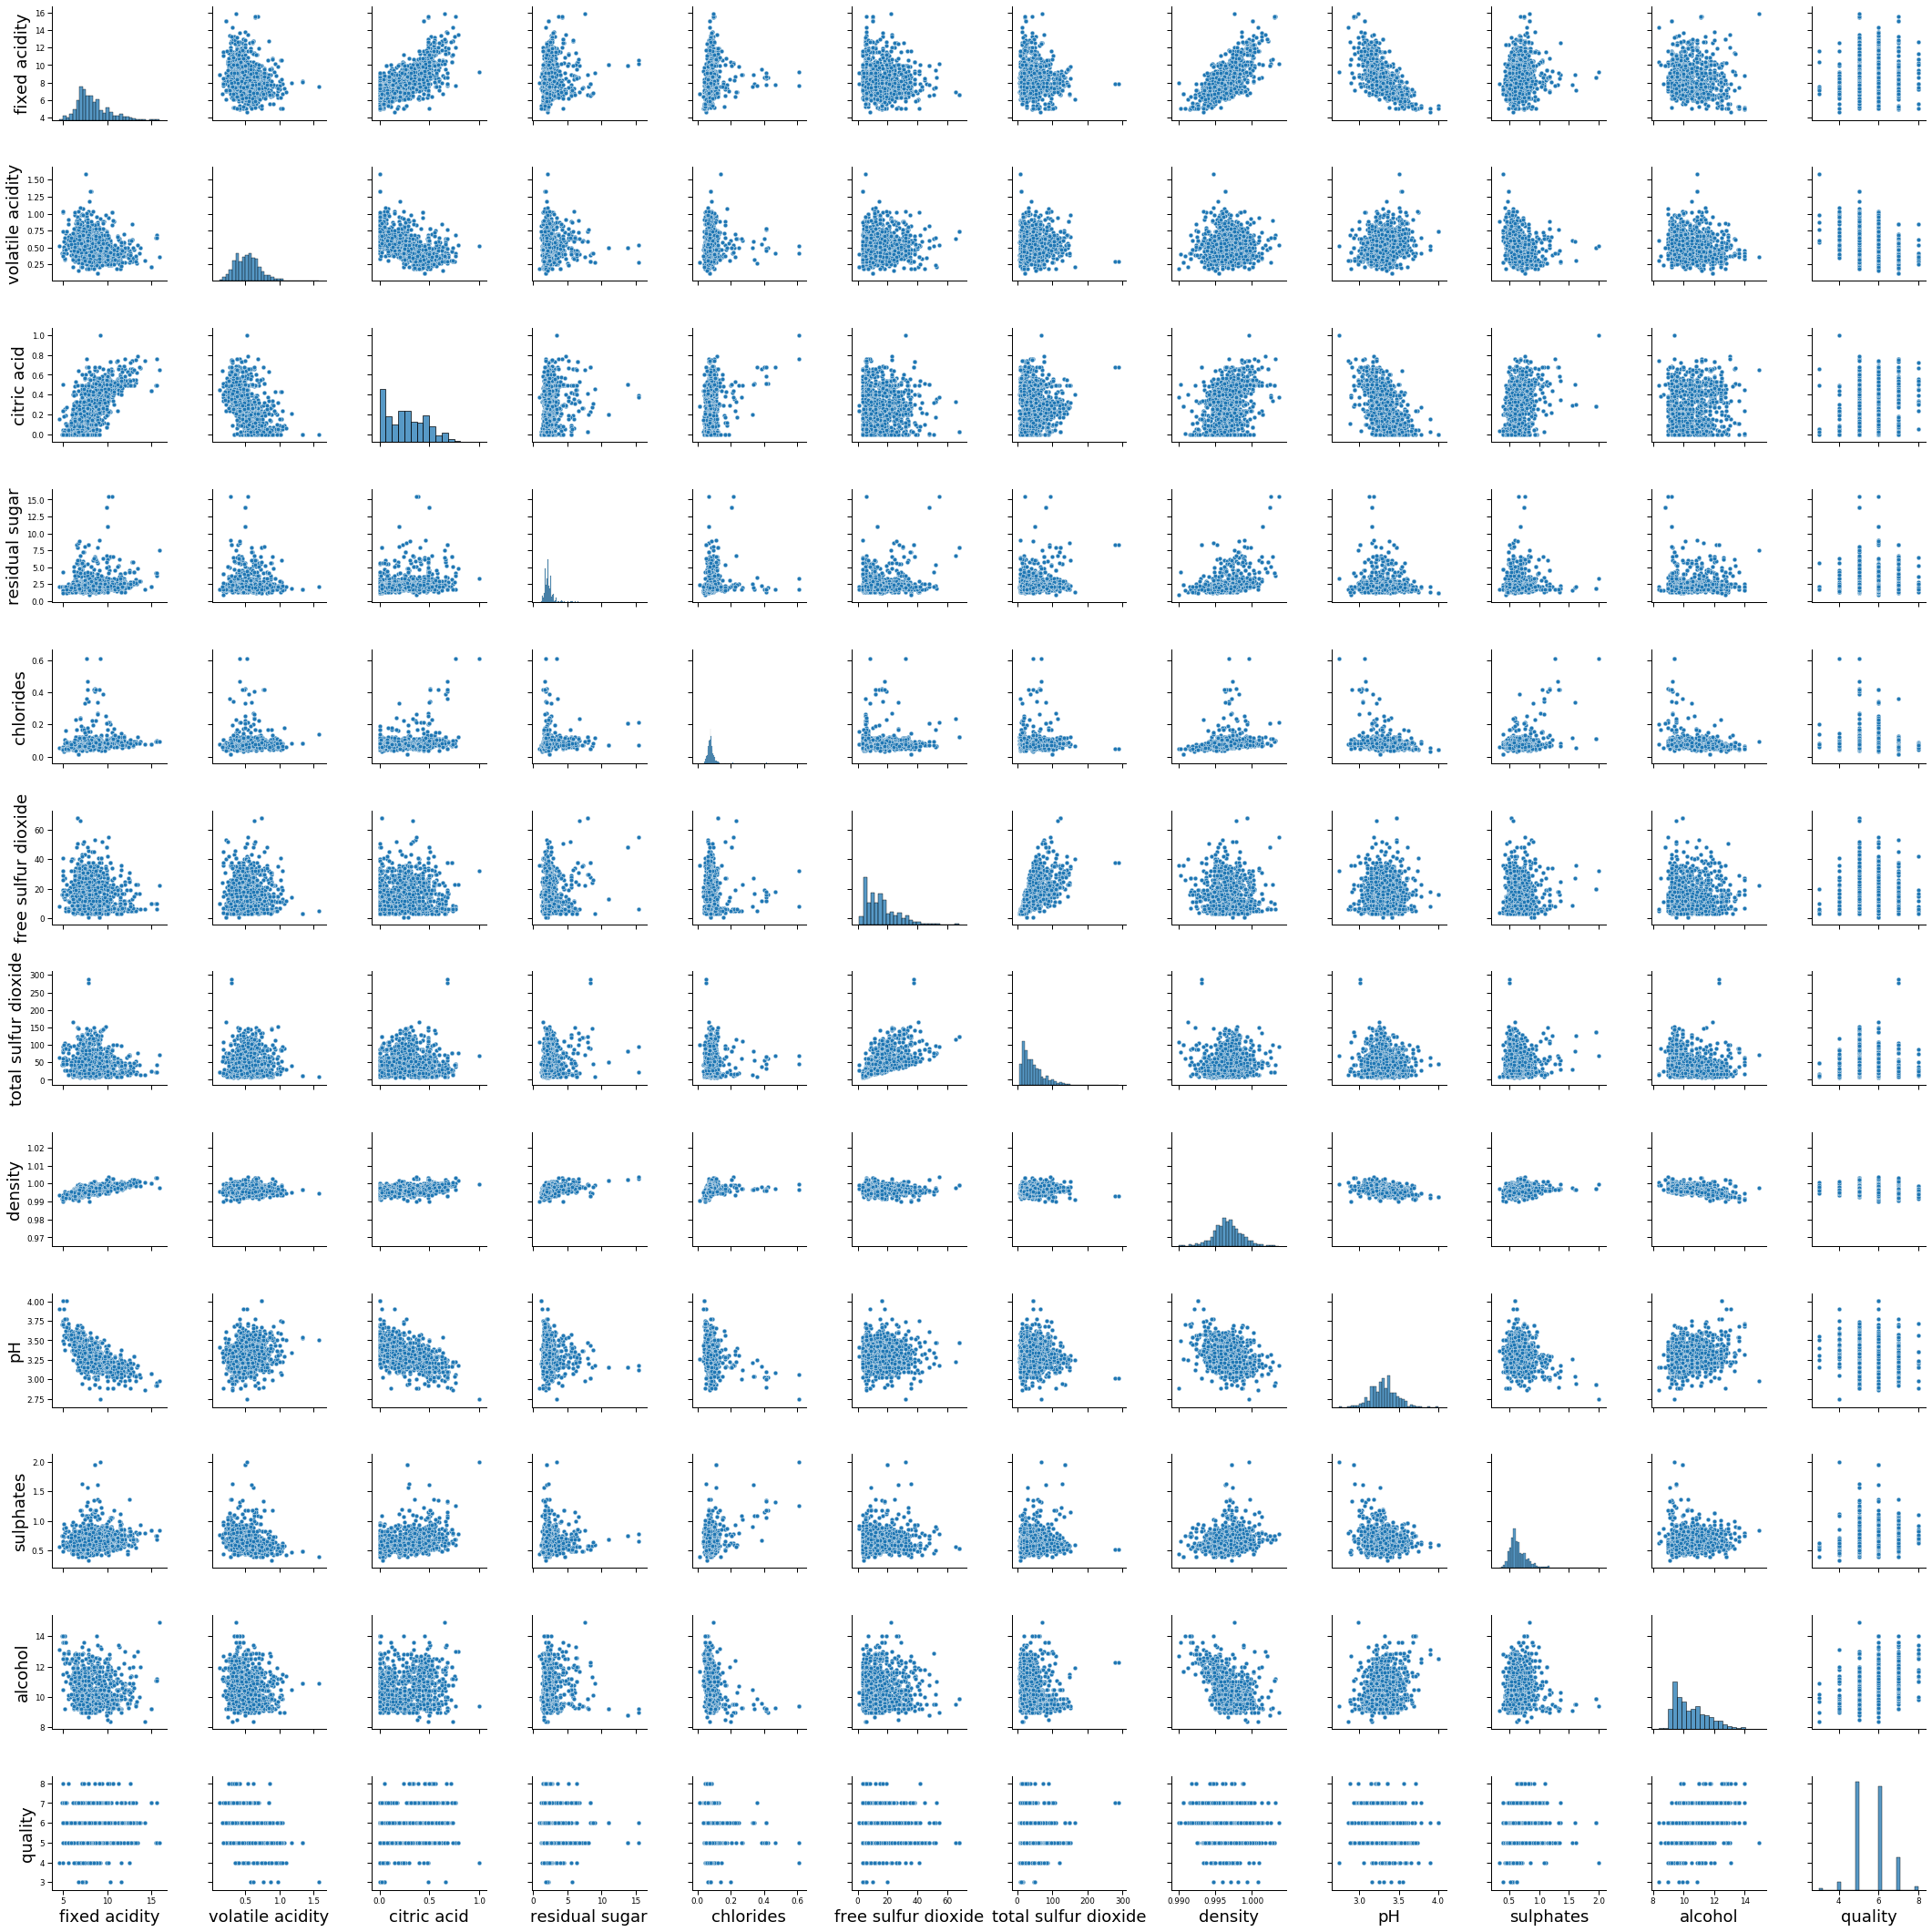

In [4]:
#### Pair Plot ######
sns.set_context("paper", rc={"axes.labelsize":18})
sns.pairplot(wine_data)

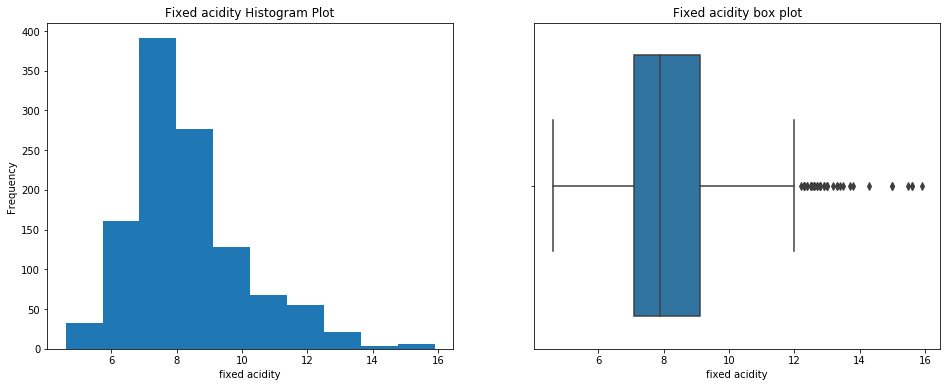

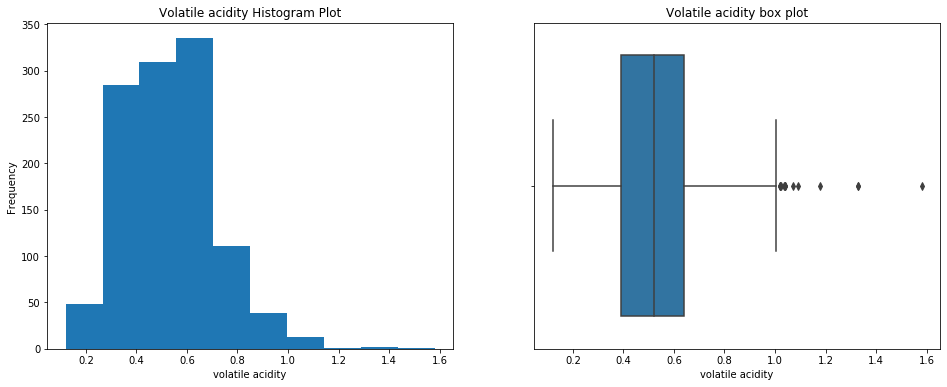

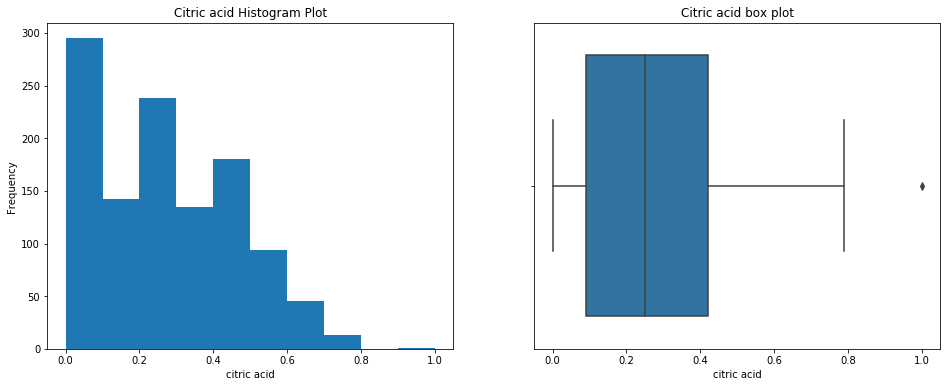

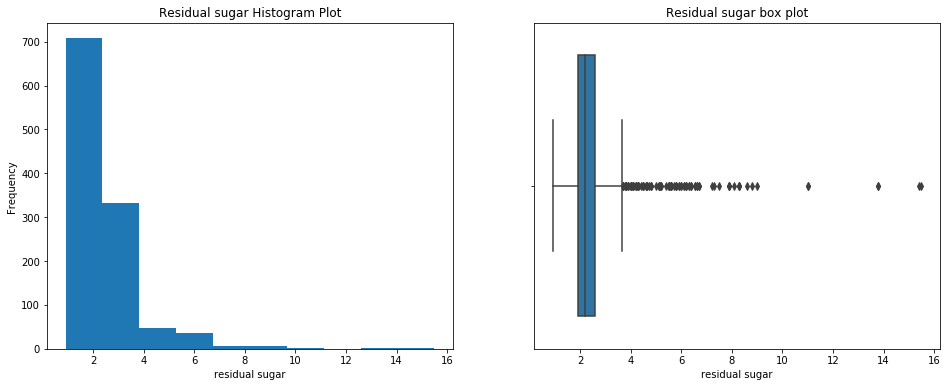

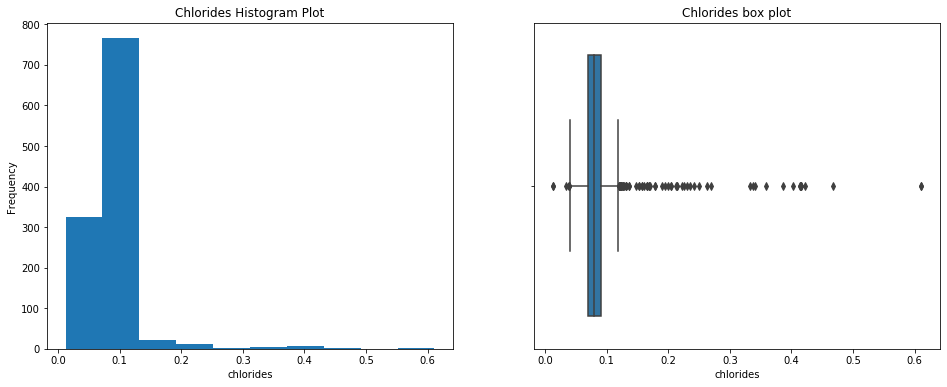

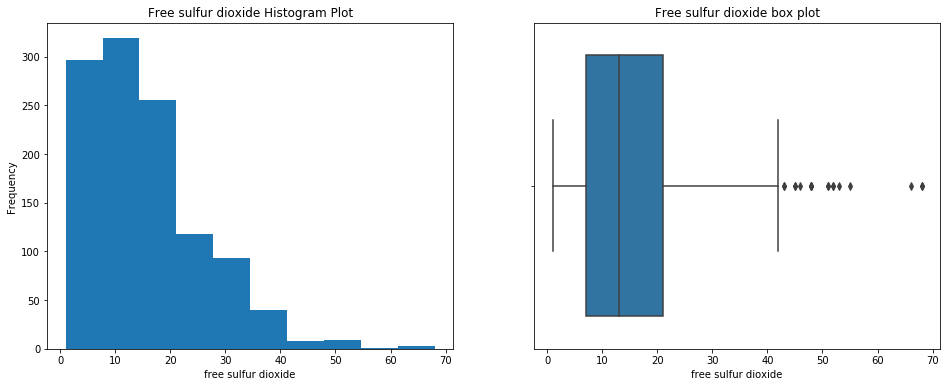

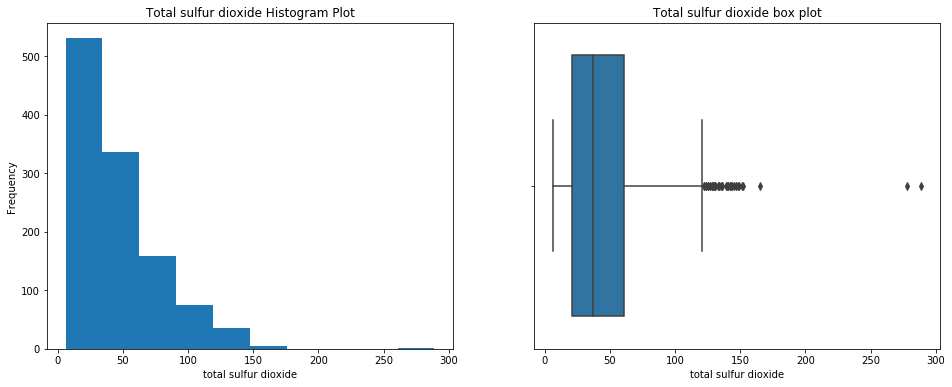

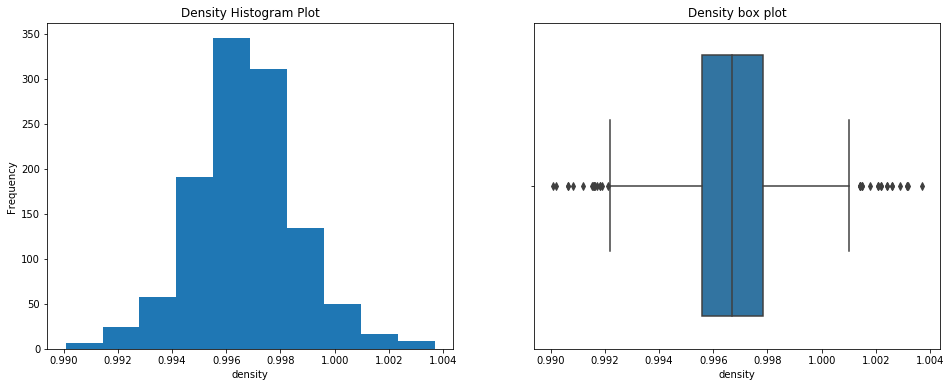

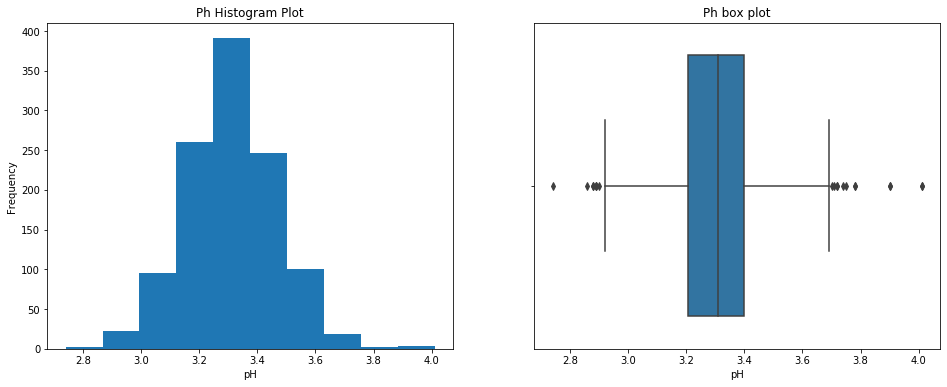

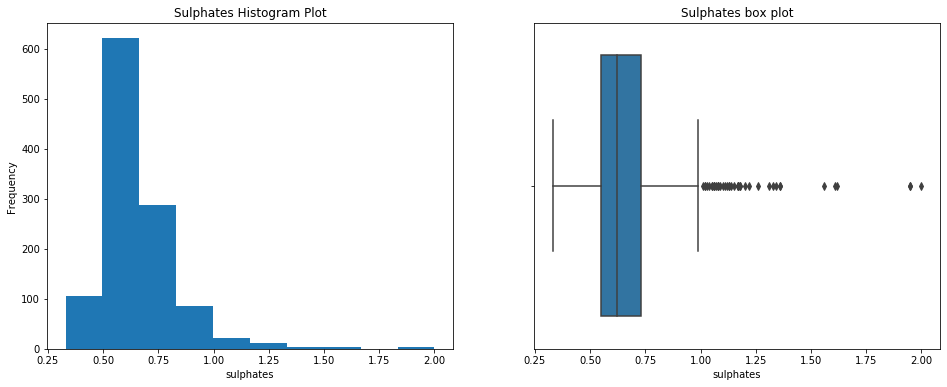

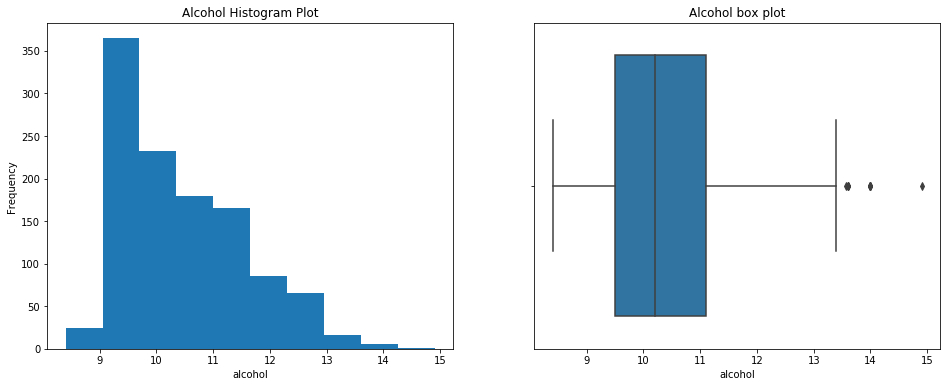

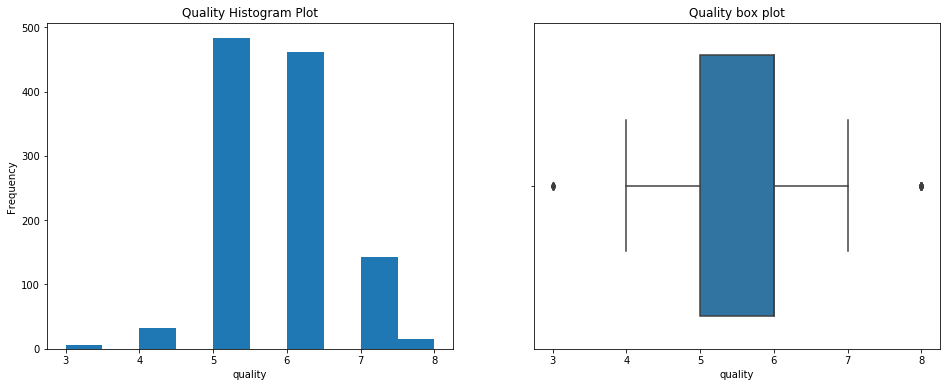

In [6]:
##### Iteratively Make Plots ######
for column_name, column_data in wine_data.iteritems():
    #### Histogram ####
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    column_data.plot(kind = 'hist')
    plt.xlabel(column_name)
    plt.title('{} Histogram Plot'.format(column_name.capitalize()))
    #### Box Plot ######
    plt.subplot(1, 2, 2)
    sns.boxplot(column_data)
    plt.title('{} box plot'.format(column_name.capitalize()))
    plt.show()

In [5]:
######### PCA Python: Setup Normalize data #########
# https://www.youtube.com/watch?v=Lsue2gEM9D0
from sklearn.decomposition import PCA
from sklearn import preprocessing
wine_x = wine_data.drop(['quality'], axis = 1)
scaled_data_x = preprocessing.StandardScaler().fit_transform(wine_x) #Normalizes data
#wine_x.head()

In [6]:
##### Run PCA ##########
pca = PCA()
pca.fit(scaled_data_x)
pca_data = pca.fit_transform(scaled_data_x)

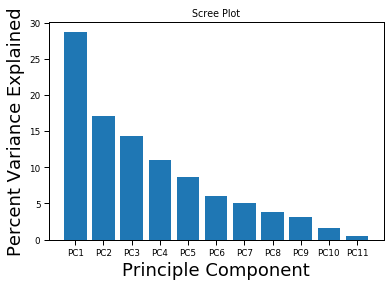

In [7]:
# Scree Plot
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+ str(x) for x in range(1,len(per_var)+1)]
plt.bar(x=labels,height=per_var)
plt.ylabel('Percent Variance Explained')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

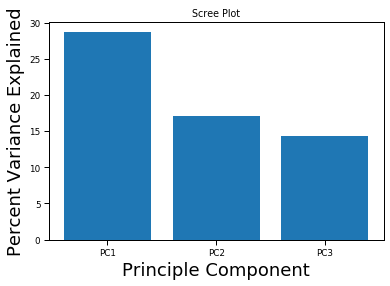

In [18]:
# PCA With only 3 Principle Components
pca_3 = PCA(n_components=3)
pca_3.fit(scaled_data_x)
pca_3_data = pca_3.fit_transform(scaled_data_x)

per_var_3 = np.round(pca_3.explained_variance_ratio_*100,decimals=1)
labels = ['PC1','PC2','PC3']
plt.bar(x=labels,height=per_var_3)
plt.ylabel('Percent Variance Explained')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

In [20]:
# Look at PCA DF
pca_x_df = pd.DataFrame(data = pca_3_data, columns = labels)
pca_x_df['quality'] = wine_data['quality']
pca_x_df.head(15)

,PC1,PC2,PC3,quality
0,-1.561545,0.444892,-1.767209,5
1,-0.760892,1.915058,-0.864158,5
2,-0.708085,0.914423,-1.142363,5
3,2.308166,-0.224448,0.256895,6
4,-1.561545,0.444892,-1.767209,5
5,-1.535160,0.565350,-1.531167,5
6,-1.084649,0.660731,-1.093198,5
7,-2.217626,-0.358490,-1.021956,7
8,-1.041355,-0.306294,-1.527475,7
9,-1.099208,0.903253,-0.758574,5


Text(0, 0.5, 'PC2 - 17.1%')

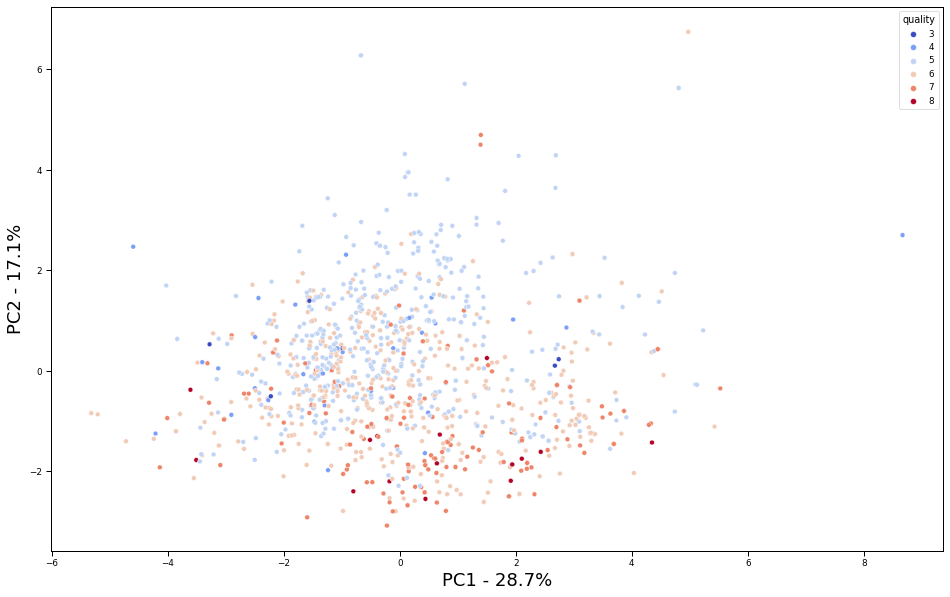

In [21]:
# Vizualize PCA
plt.figure(figsize=(16, 10))
sns.scatterplot(data=pca_x_df, x="PC1", y="PC2", hue="quality", legend="full",palette="coolwarm")
plt.xlabel('PC1 - {}%'.format(per_var[0]))
plt.ylabel('PC2 - {}%'.format(per_var[1]))

Text(0, 0.5, 'PC3 - 14.3%')

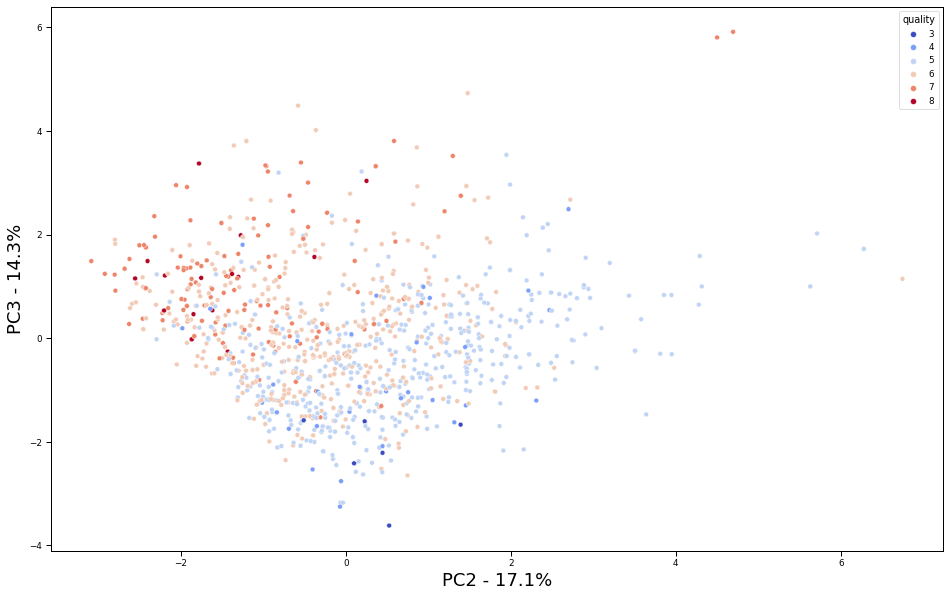

In [33]:
# Vizualize PCA
plt.figure(figsize=(16, 10))
sns.scatterplot(data=pca_x_df, x="PC2", y="PC3", hue="quality", legend="full",palette="coolwarm")
plt.xlabel('PC2 - {}%'.format(per_var[1]))
plt.ylabel('PC3 - {}%'.format(per_var[2]))

In [11]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Pa

In [27]:
###### PC Loading Scores #####
#PC1
pc1_loading_scores = pd.Series(pca_3.components_[0],index=list(wine_x.columns))
pc1_sorted_loading = pc1_loading_scores.abs().sort_values(ascending=False)
pc1_top = pc1_sorted_loading[0:10].index.values
print('PC1 Variables')
print(pc1_loading_scores[pc1_top])
print('')
#pc2
pc2_loading_scores = pd.Series(pca_3.components_[1],index=list(wine_x.columns))
pc2_sorted_loading = pc2_loading_scores.abs().sort_values(ascending=False)
pc2_top = pc2_sorted_loading[0:10].index.values
print('PC2 Variables')
print(pc2_loading_scores[pc2_top])
print('')
#pc3
pc3_loading_scores = pd.Series(pca_3.components_[2],index=list(wine_x.columns))
pc3_sorted_loading = pc3_loading_scores.abs().sort_values(ascending=False)
pc3_top = pc3_sorted_loading[0:10].index.values
print('PC3 Variables')
print(pc3_loading_scores[pc3_top])

PC1 Variables
fixed acidity          0.485339
citric acid            0.460075
pH                    -0.432844
density                0.399684
sulphates              0.237555
volatile acidity      -0.227143
chlorides              0.224870
residual sugar         0.174506
alcohol               -0.118799
free sulfur dioxide   -0.047852
dtype: float64

PC2 Variables
total sulfur dioxide    0.577393
free sulfur dioxide     0.517022
alcohol                -0.381635
volatile acidity        0.288786
residual sugar          0.252262
density                 0.217537
chlorides               0.153133
citric acid            -0.146508
fixed acidity          -0.102328
sulphates              -0.062280
dtype: float64

PC3 Variables
alcohol                 0.470201
volatile acidity       -0.443718
free sulfur dioxide     0.428288
density                -0.334238
total sulfur dioxide    0.323424
sulphates               0.302768
citric acid             0.246843
fixed acidity          -0.122376
residual sug

In [31]:
### K Means Cluster Analysis ####
from sklearn.cluster import KMeans

num_clusters = 3
#num_clusters = 4
iterations = 300


kmeans = KMeans(
        init="random",
        n_clusters=num_clusters,
        n_init=10,
        max_iter=iterations,
        random_state=42
)
x = pca_x_df[['PC1','PC2']]
kmeans.fit(x)

KMeans(init='random', n_clusters=3, random_state=42)

In [26]:
#help(KMeans)

Text(0, 0.5, 'PC2 - 17.1%')

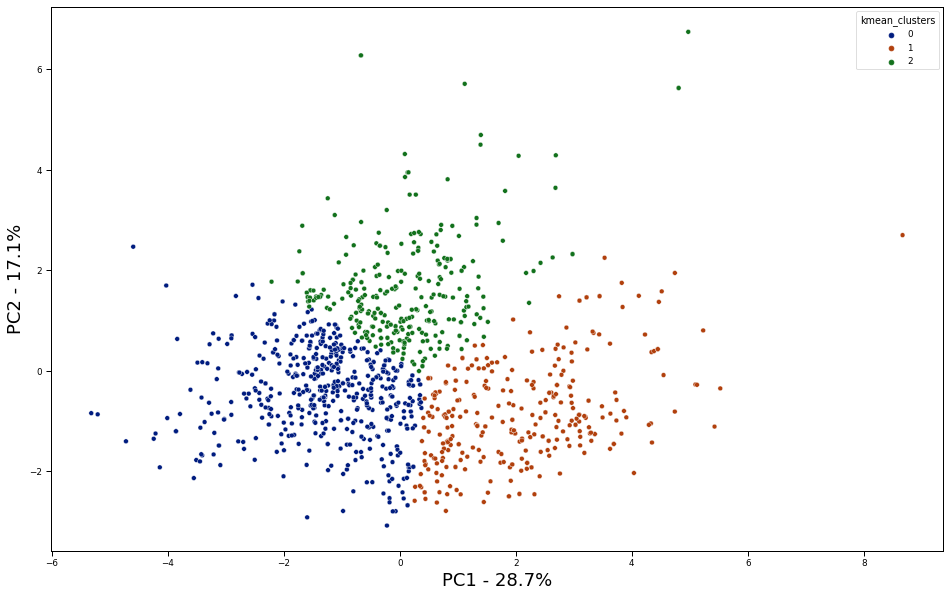

In [32]:
pca_x_df['kmean_clusters']=kmeans.labels_
# Vizualize PCA with kmeans
plt.figure(figsize=(16, 10))
sns.scatterplot(data=pca_x_df, x="PC1", y="PC2", hue="kmean_clusters", legend="full",palette="dark")
plt.xlabel('PC1 - {}%'.format(per_var_2[0]))
plt.ylabel('PC2 - {}%'.format(per_var_2[1]))

In [27]:
pca_x_df.head()

,PC1,PC2,quality,kmean_clusters
0,-1.561545,0.444892,5,2
1,-0.760892,1.915058,5,0
2,-0.708085,0.914423,5,0
3,2.308166,-0.224448,6,1
4,-1.561545,0.444892,5,2


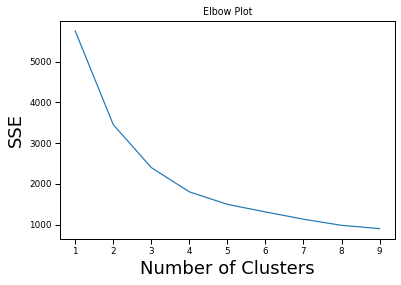

In [30]:
x = pca_x_df[['PC1','PC2']]
clusters=[]
for k in range(1, 10):
    kmeans = KMeans(
        init="random",
        n_clusters=k,
        n_init=10,
        max_iter=300,
        random_state=42
        )
    kmeans.fit(x)
    clusters.append(kmeans.inertia_) #Variance Explained
    
plt.plot(range(1, 10), clusters)
plt.xticks(range(1, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title('Elbow Plot')
plt.show()

In [34]:
### Multivariate Linear Regression ####

wine_x = wine_data.drop(['quality'], axis = 1)
wine_y=list(wine_data['quality'])
lm = sm.OLS(wine_y, wine_x)
lm2 = lm.fit()
print(lm2.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8168.
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:36:19   Log-Likelihood:                         -1107.1
No. Observations:                1143   AIC:                                      2236.
Df Residuals:                    1132   BIC:                                      2292.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [30]:
wine_x = wine_data.drop(['quality','fixed acidity','citric acid','residual sugar','free sulfur dioxide'], axis = 1)
wine_y=list(wine_data['quality'])
lm = sm.OLS(wine_y, wine_x)
lm2 = lm.fit()
print(lm2.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.286e+04
Date:                Tue, 15 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:36:31   Log-Likelihood:                         -1108.1
No. Observations:                1143   AIC:                                      2230.
Df Residuals:                    1136   BIC:                                      2265.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [28]:
# Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(wine_x.values, i) for i in range(wine_x.shape[1])]
vif["features"] = wine_x.columns
vif.head(10)

,VIF Factor,features
0,12.039755,volatile acidity
1,5.923024,chlorides
2,3.089446,total sulfur dioxide
3,564.358017,density
4,538.965723,pH
5,21.271748,sulphates
6,114.243947,alcohol


In [39]:
# Model 2
wine_x = wine_data.drop(['quality',
                         'fixed acidity',
                         'citric acid',
                         #'residual sugar',
                         'free sulfur dioxide',
                         'pH',
                          #'density',
                         'alcohol',
                         'chlorides',
                         'total sulfur dioxide'
                        ], axis = 1)
wine_y=list(wine_data['quality'])
lm = sm.OLS(wine_y, wine_x)
lm2 = lm.fit()
print(lm2.summary())
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(wine_x.values, i) for i in range(wine_x.shape[1])]
vif["features"] = wine_x.columns
vif.head(10)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                          1.726e+04
Date:                Mon, 24 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:41:20   Log-Likelihood:                         -1258.9
No. Observations:                1143   AIC:                                      2526.
Df Residuals:                    1139   BIC:                                      2546.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

,VIF Factor,features
0,10.571393,volatile acidity
1,4.503823,residual sugar
2,36.915925,density
3,17.275097,sulphates
